In [39]:
# Module 11 - Part 2: Mars Weather
# import dependencies
from splinter import Browser
from bs4 import BeautifulSoup, element
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [3]:
browser = Browser('chrome')

In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [ ]:
# browser close for end
browser.quit()

In [5]:
# time for soup
html =  browser.html
soup = BeautifulSoup(html, features='html.parser')

In [11]:
# id table container, it's named table
table_container = soup.find('table', class_ = 'table')
# run through table_container
# first we want all of the table rows, not adding class_='data-row'
# data[0] can be used as our column headers
if table_container:
    data = []
    table_rows = table_container.find_all("tr")
    for row in table_rows:
        # looking at each individual cell, individual cells hail from either th (for headers)
        # or td (for the actual numbers)
        ind_cells = row.find_all(['th','td'])
        row_data = [ind_cell.get_text(strip=True) for ind_cell in ind_cells]
        data.append(row_data)

In [15]:
# data[0] contains headers, use headers as column names in df
mars_headers = data[0]
# data[1:] are the numbas, col data will be parsed in line with headers
mars_data = data[1:]
mars_scrape_df = pd.DataFrame(mars_data, columns=mars_headers)
# recast columns as specific data types
mars_scrape_df['id'] = mars_scrape_df['id'].astype(object)
mars_scrape_df['terrestrial_date'] = pd.to_datetime(mars_scrape_df['terrestrial_date'])
mars_scrape_df['sol'] = mars_scrape_df['sol'].astype(int)
mars_scrape_df['ls'] = mars_scrape_df['ls'].astype(int)
mars_scrape_df['month'] = mars_scrape_df['month'].astype(int)
mars_scrape_df['min_temp'] = mars_scrape_df['min_temp'].astype(float)
mars_scrape_df['pressure'] = mars_scrape_df['pressure'].astype(float)
mars_scrape_df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [16]:
# creating an output csv
output_folder = "Output"
output_csv = f"{output_folder}/mars_temperature_data.csv"
# output as mars_temperature_data
mars_scrape_df.to_csv(output_csv, sep=',', encoding='utf-8', index=False)

In [17]:
# confirm data types od scraped info
mars_scrape_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### questions, O questions

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [28]:
#1. 
month_max = mars_scrape_df['month'].max()
month_count = mars_scrape_df['month'].value_counts().sort_index()
print(f"There are", month_max, "martian months")
print(f"Here's the frequency of each months appearance: ")
print(month_count)

There are 12 martian months
Here's the frequency of each months appearance: 
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [29]:
#2. pd.unique also works
observations = 0 
for number in mars_scrape_df['sol']:
    observations += 1
print(observations)

1867


In [35]:
# 3. averages group by month, setting numeric_only to pare down
mars_avg = mars_scrape_df.groupby('month').mean(numeric_only=True)
select_min_temp = mars_avg['min_temp']
print(select_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


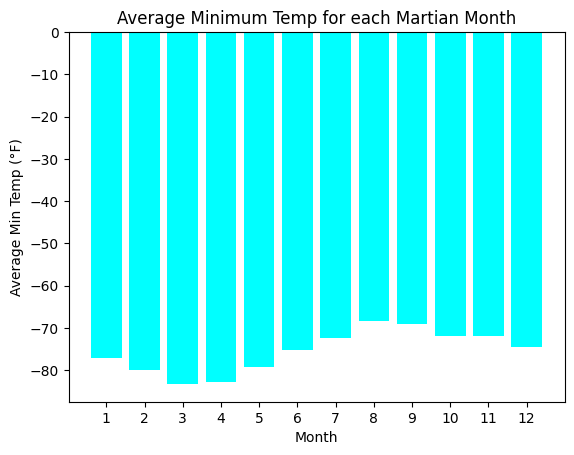

In [50]:
# 3. Bar Chart for min temps by month
plt.bar(select_min_temp.index, select_min_temp.values, align='center', color='aqua')
plt.title("Average Minimum Temp for each Martian Month")
plt.xlabel("Month")
plt.xticks(select_min_temp.index, rotation = 0, ha='center')
plt.ylabel("Average Min Temp (°F)")
plt.show()

In [62]:
#4. selecting for average pressure, lowest pressure id, greatest pressure id
select_avg_pressure = mars_avg['pressure']
lowest_pressure = select_avg_pressure.min()
greatest_pressure = select_avg_pressure.max()
print(round(select_avg_pressure, 3))
print(f"Lowest average pressure: ", round(lowest_pressure, 3))
print(f"Greatest average pressure: ", round(greatest_pressure, 3))

month
1     862.489
2     889.455
3     877.323
4     806.330
5     748.557
6     745.054
7     795.106
8     873.830
9     913.306
10    887.312
11    857.014
12    842.157
Name: pressure, dtype: float64
Lowest average pressure:  745.054
Greatest average pressure:  913.306


In [ ]:
#4.